<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

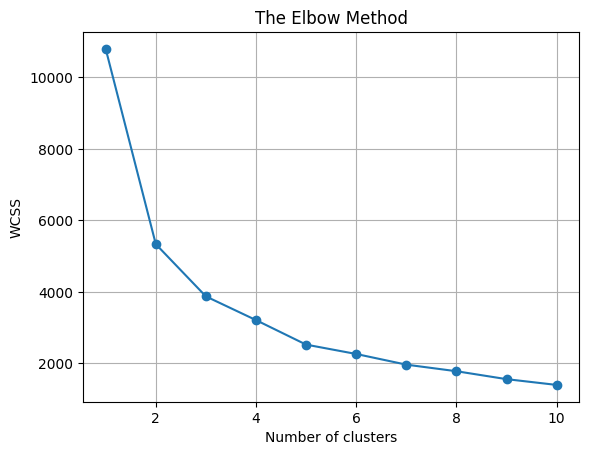

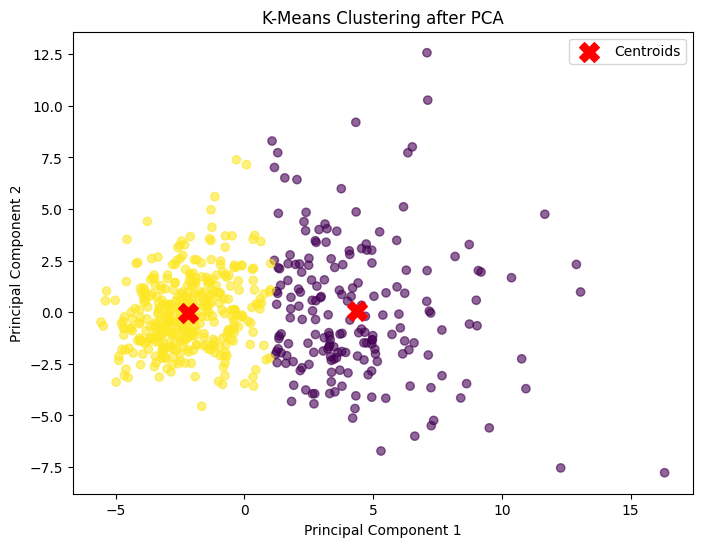

In [5]:
# Experiment 10
# Develop a program to implement k-means clustering using Wisconsin Breast Cancer data set and visualize the clustering result.

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv(r"C:\Users\My PC\Downloads\Wisconsin Breast Cancer dataset.csv")
data.head()
data.shape
data.info()

# Check unique diagnosis labels
data['diagnosis'].unique()

# Check for missing values
data.isnull().sum()

# Check for duplicates
data.duplicated().sum()

# Drop irrelevant columns
df = data.drop(columns=['id', 'Unnamed: 32'])

# Map diagnosis to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Descriptive Statistics
df.describe().T

# Drop the 'diagnosis' column for clustering (since clustering is unsupervised)
df.drop(columns=["diagnosis"], inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained Variance
print("Variance explained by PC1:", pca.explained_variance_ratio_[0])
print("Variance explained by PC2:", pca.explained_variance_ratio_[1])
print("Total variance explained by first 2 components:", pca.explained_variance_ratio_.sum())

# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#Apply K-Means Clustering with the optimal k (usually where elbow occurs, k=2)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)
# Step 7: Visualize the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red',marker='X',label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering after PCA")
plt.legend()
plt.show()